In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Datasets/placement.csv')

In [3]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

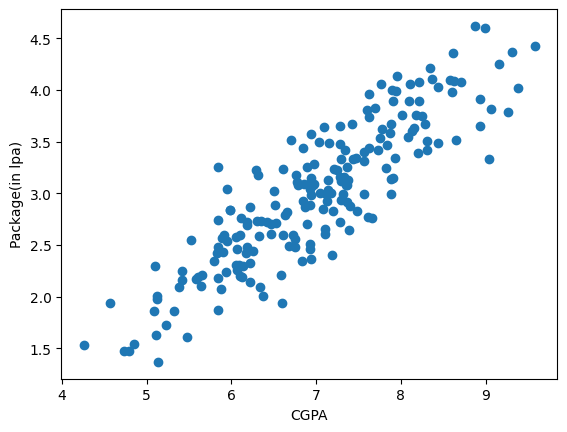

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

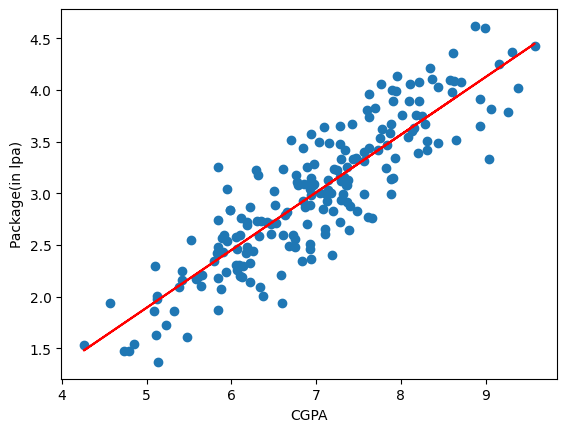

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [15]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [16]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [18]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [20]:
print("Adjusted R2 score ",1 - ((1-r2)*(40-1)/(40-1-1)))

Adjusted R2 score  0.7749598882343415


In [21]:
#Adding a random feature
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.076710,3.26
1,5.12,0.597036,1.98
2,7.82,0.609173,3.25
3,7.42,0.314926,3.67
4,6.94,0.980249,3.57


Text(0, 0.5, 'Package(in lpa)')

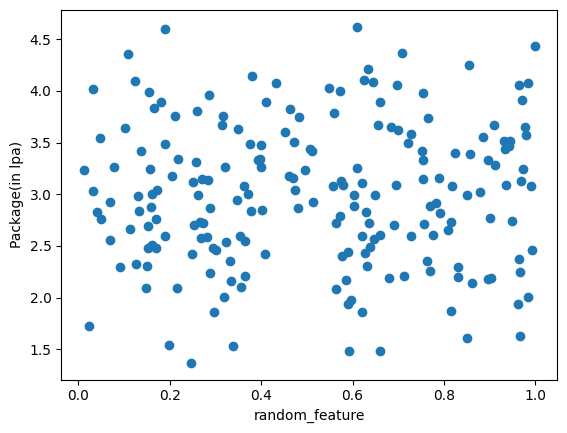

In [23]:
#There's no relation between random feature and package
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [24]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7828138496463868


In [31]:
#Adjusted R2 score decreases when random variable is introduced
print("Adjusted R2 score ",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted R2 score  0.7710740577353807


In [33]:
#Adding a dependent feature to df
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [34]:
new_df2.sample(5)

,cgpa,iq,package
19,7.48,1.63,2.83
33,6.35,1.53,2.73
42,5.95,1.84,2.54
7,6.75,3.08,2.48
113,6.94,1.67,2.37


Text(0, 0.5, 'Package(in lpa)')

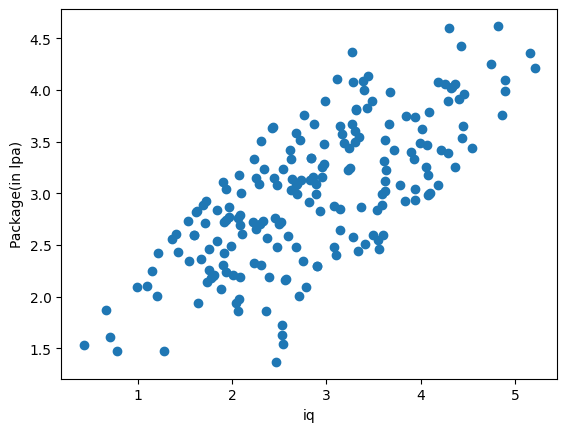

In [35]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [36]:
np.random.randint(-100,100)

5

In [37]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [40]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8426839665444484


In [42]:
print("Adjusted R2 score ",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted R2 score  0.8341803971684727
